In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("../../data/botswana.tsv", sep="\t", index_col=False) 
df.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [4]:
len(df.dropna())

1834

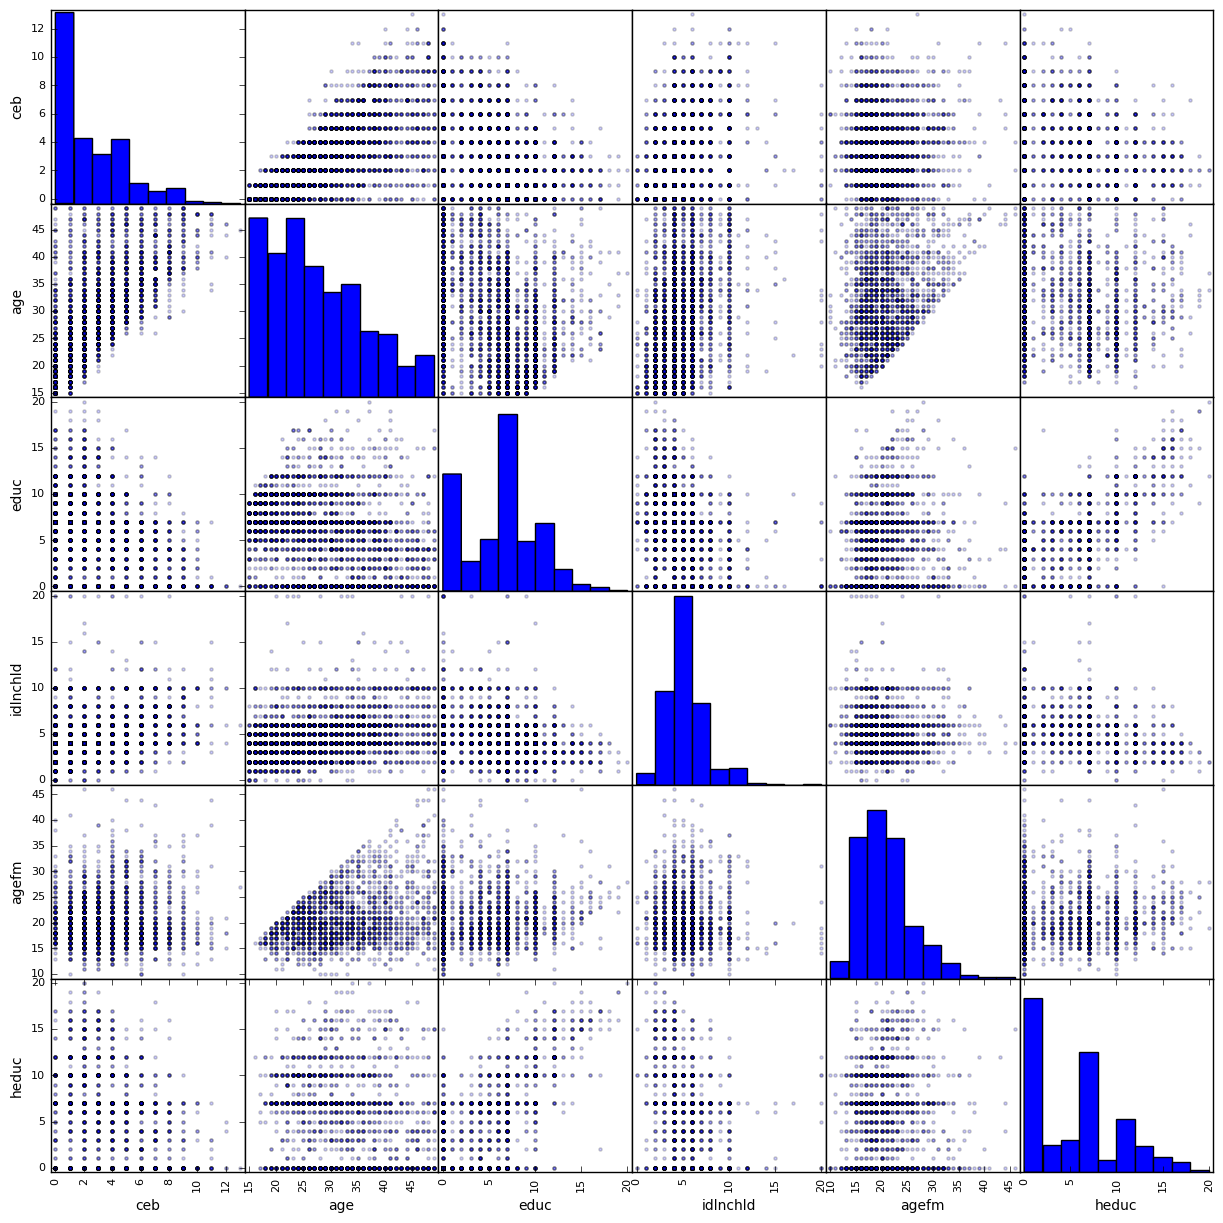

In [5]:
pd.tools.plotting.scatter_matrix(df[['ceb', 'age', 'educ', 'idlnchld', 'agefm', 'heduc']], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

In [6]:
print(df.religion.value_counts(dropna=False))
print(df.knowmeth.value_counts(dropna=False))
print(df.usemeth.value_counts(dropna=False))
print(df.urban.value_counts(dropna=False))
print(df.electric.value_counts(dropna=False))
print(df.radio.value_counts(dropna=False))
print(df.tv.value_counts(dropna=False))
print(df.bicycle.value_counts(dropna=False))
print(df.evermarr.value_counts(dropna=False))

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64
 1.0    4194
 0.0     160
NaN        7
Name: knowmeth, dtype: int64
 1.0    2478
 0.0    1812
NaN       71
Name: usemeth, dtype: int64
1    2253
0    2108
Name: urban, dtype: int64
 0.0    3747
 1.0     611
NaN        3
Name: electric, dtype: int64
 1.0    3059
 0.0    1300
NaN        2
Name: radio, dtype: int64
 0.0    3954
 1.0     405
NaN        2
Name: tv, dtype: int64
 0.0    3156
 1.0    1202
NaN        3
Name: bicycle, dtype: int64
0    2282
1    2079
Name: evermarr, dtype: int64


In [7]:
for c in df.columns:
    print("---- %s ---" % c)
    print(sum(df[c].isnull()))

---- ceb ---
0
---- age ---
0
---- educ ---
0
---- religion ---
0
---- idlnchld ---
120
---- knowmeth ---
7
---- usemeth ---
71
---- evermarr ---
0
---- agefm ---
2282
---- heduc ---
2405
---- urban ---
0
---- electric ---
3
---- radio ---
2
---- tv ---
2
---- bicycle ---
3


Во многих признаках есть пропуски, причём они разной природы. Будем обрабатывать их по-разному.

In [8]:
df['nevermarr'] = 1 - df['evermarr']
df.agefm[df.agefm.isnull()] = 0
df.heduc[df.nevermarr == 1] = -1
df.drop('evermarr', axis=1, inplace=True)
sum(df['heduc'].isnull())

123

In [9]:
df['idlnchld_noans'] = np.where(df.idlnchld.isnull(), 1, 0)
df.idlnchld[df.idlnchld.isnull()] = -1
df.idlnchld.value_counts(dropna=False)

 4.0     1455
 6.0      718
 2.0      499
 5.0      490
 3.0      465
 10.0     166
 8.0      139
 7.0      125
-1.0      120
 1.0       95
 9.0       25
 0.0       21
 12.0      16
 20.0      11
 15.0       7
 11.0       3
 14.0       3
 13.0       1
 16.0       1
 17.0       1
Name: idlnchld, dtype: int64

In [10]:
df.heduc.value_counts(dropna=False)

-1.0     2282
 0.0      692
 7.0      396
 10.0     210
NaN       123
 6.0      102
 12.0      99
 4.0       73
 3.0       64
 5.0       62
 2.0       47
 9.0       35
 15.0      35
 14.0      29
 16.0      26
 1.0       25
 17.0      17
 8.0       17
 11.0       9
 13.0       8
 18.0       4
 19.0       4
 20.0       2
Name: heduc, dtype: int64

In [11]:
df['heduc_noans'] = np.where(df.heduc.isnull(), 1, 0)
df.heduc[df.heduc.isnull()] = -2
df.heduc.value_counts(dropna=False)

-1.0     2282
 0.0      692
 7.0      396
 10.0     210
-2.0      123
 6.0      102
 12.0      99
 4.0       73
 3.0       64
 5.0       62
 2.0       47
 9.0       35
 15.0      35
 14.0      29
 16.0      26
 1.0       25
 17.0      17
 8.0       17
 11.0       9
 13.0       8
 18.0       4
 19.0       4
 20.0       2
Name: heduc, dtype: int64

In [12]:
df['usemeth_noans'] = np.where(df.usemeth.isnull(), 1, 0)
df.usemeth[df.usemeth.isnull()] = -1
df.usemeth.value_counts(dropna=False)

 1.0    2478
 0.0    1812
-1.0      71
Name: usemeth, dtype: int64

In [13]:
for c in df.columns:
    print("---- %s ---" % c)
    print(sum(df[c].isnull()))

---- ceb ---
0
---- age ---
0
---- educ ---
0
---- religion ---
0
---- idlnchld ---
0
---- knowmeth ---
7
---- usemeth ---
0
---- agefm ---
0
---- heduc ---
0
---- urban ---
0
---- electric ---
3
---- radio ---
2
---- tv ---
2
---- bicycle ---
3
---- nevermarr ---
0
---- idlnchld_noans ---
0
---- heduc_noans ---
0
---- usemeth_noans ---
0


In [14]:
df = df.dropna()

In [15]:
df.shape

(4348, 18)

In [16]:
df.columns

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')

In [17]:
df.to_csv('../../data/botswana_processed.csv', sep=',')

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:12:59   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

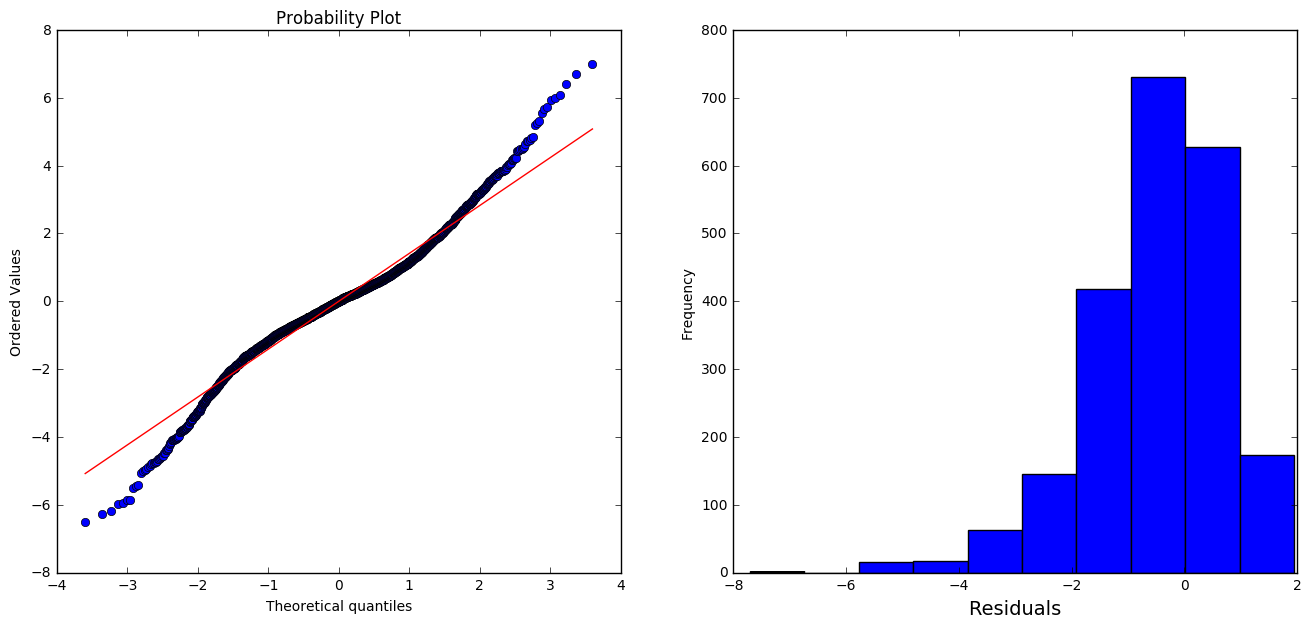

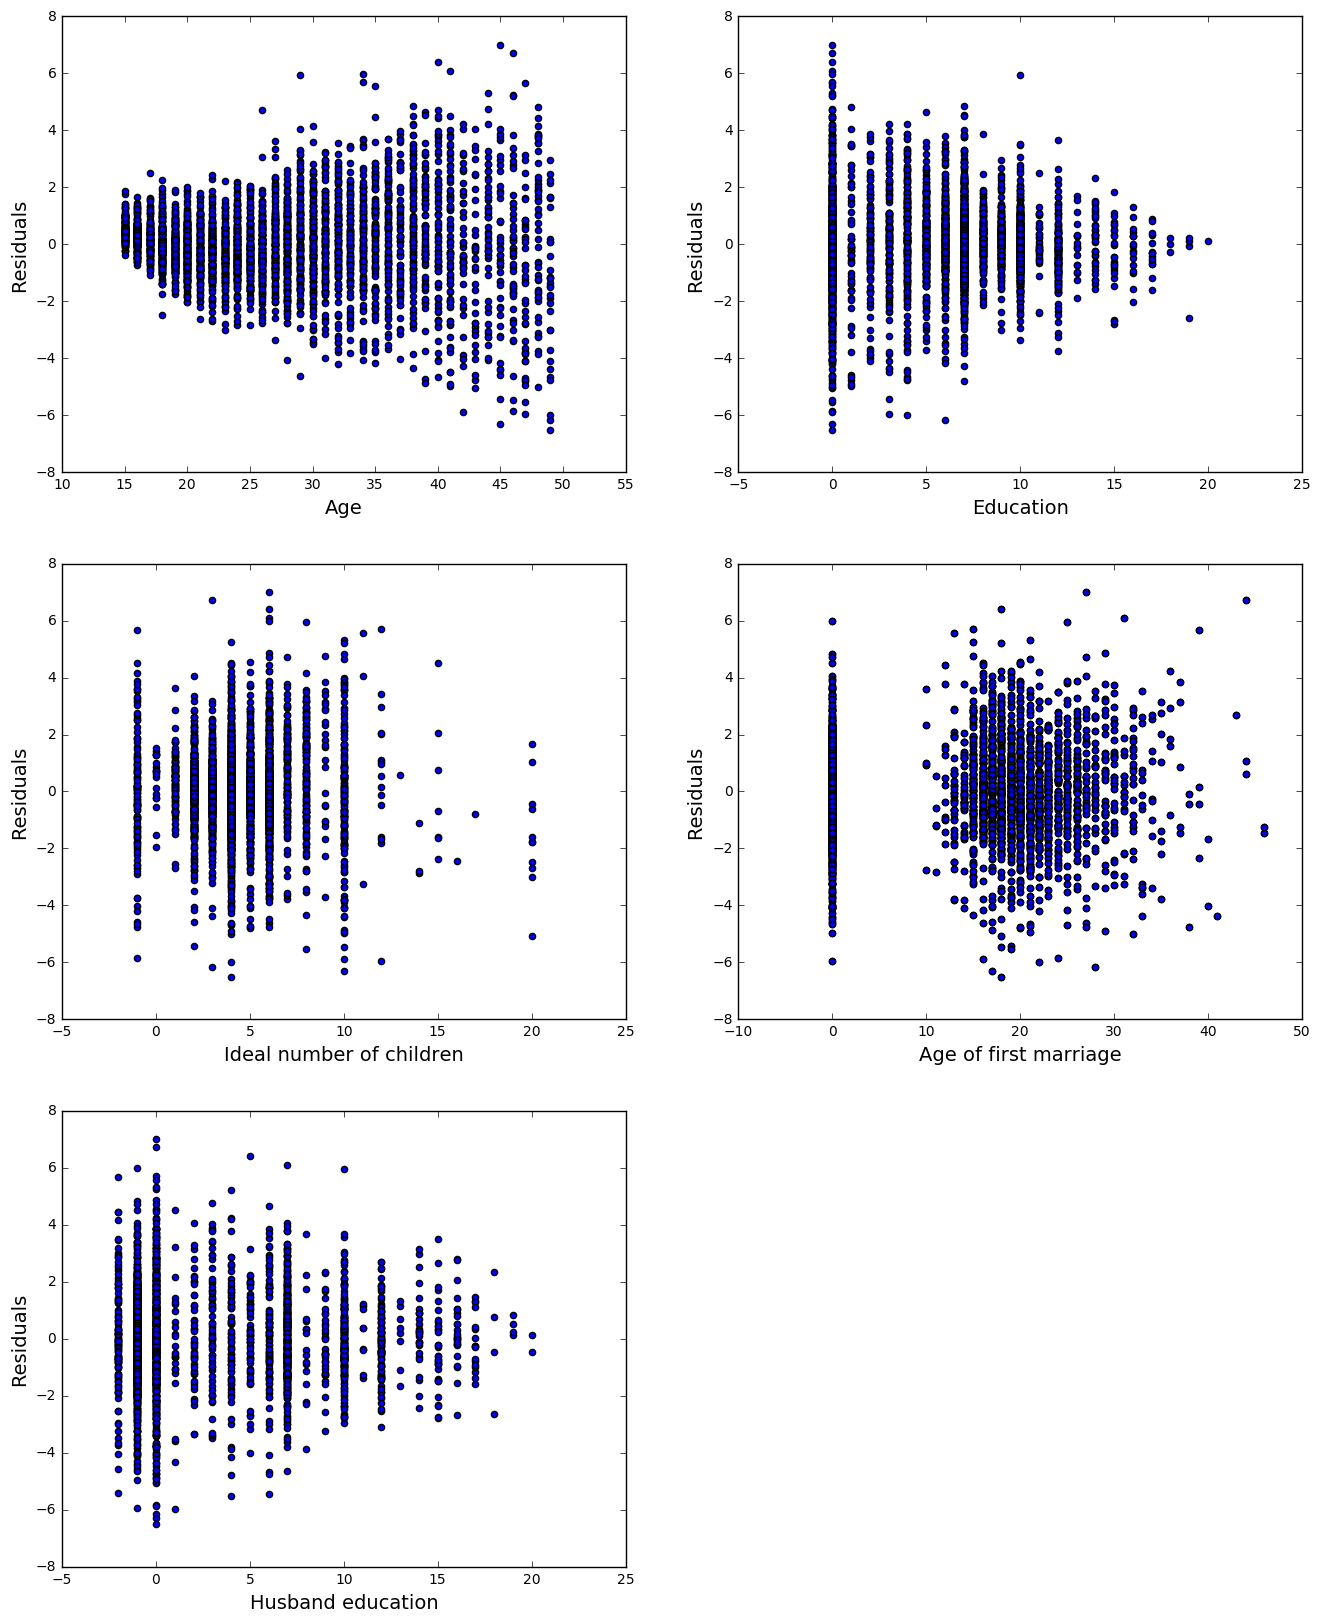

In [18]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + '\
                   'bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)

plt.figure(figsize(16,20))
plt.subplot(3,2,1)
scatter(df['age'],fitted.resid)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(3,2,2)
scatter(df['educ'],fitted.resid)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(3,2,3)
scatter(df['idlnchld'],fitted.resid)
plt.xlabel('Ideal number of children', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(3,2,4)
scatter(df['agefm'],fitted.resid)
plt.xlabel('Age of first marriage', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(3,2,4)
scatter(df['agefm'],fitted.resid)
plt.xlabel('Age of first marriage', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(3,2,5)
scatter(df['heduc'],fitted.resid)
plt.xlabel('Husband education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
pylab.show()

In [19]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + '\
             'heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + '\
             'heduc_noans + usemeth_noans', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:13:03   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [20]:
print('Breusch-Pagan test: p=%s' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=1.14529276334e-225


In [21]:
fitted = m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:13:03   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [22]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + '\
                   'bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m2.fit()
print('Breusch-Pagan test: p=%s' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

Breusch-Pagan test: p=1.11974588965e-228
                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:13:04   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Int

In [23]:
print("F=%f, p=%f, k1=%i" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5


In [24]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric + '\
                   'bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=df)
fitted = m3.fit()
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

Breusch-Pagan test: p=0.000000
                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:13:04   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept    

In [25]:
print("F=%f, p=%s, k1=%i" % m2.fit().compare_f_test(m3.fit()))

F=92.890582, p=3.15520094804e-40, k1=2


In [26]:
m2.fit().compare_f_test(m3.fit())

(92.890582301098021, 3.1552009480371243e-40, 2.0)

In [27]:
print(m2.fit(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:13:04   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

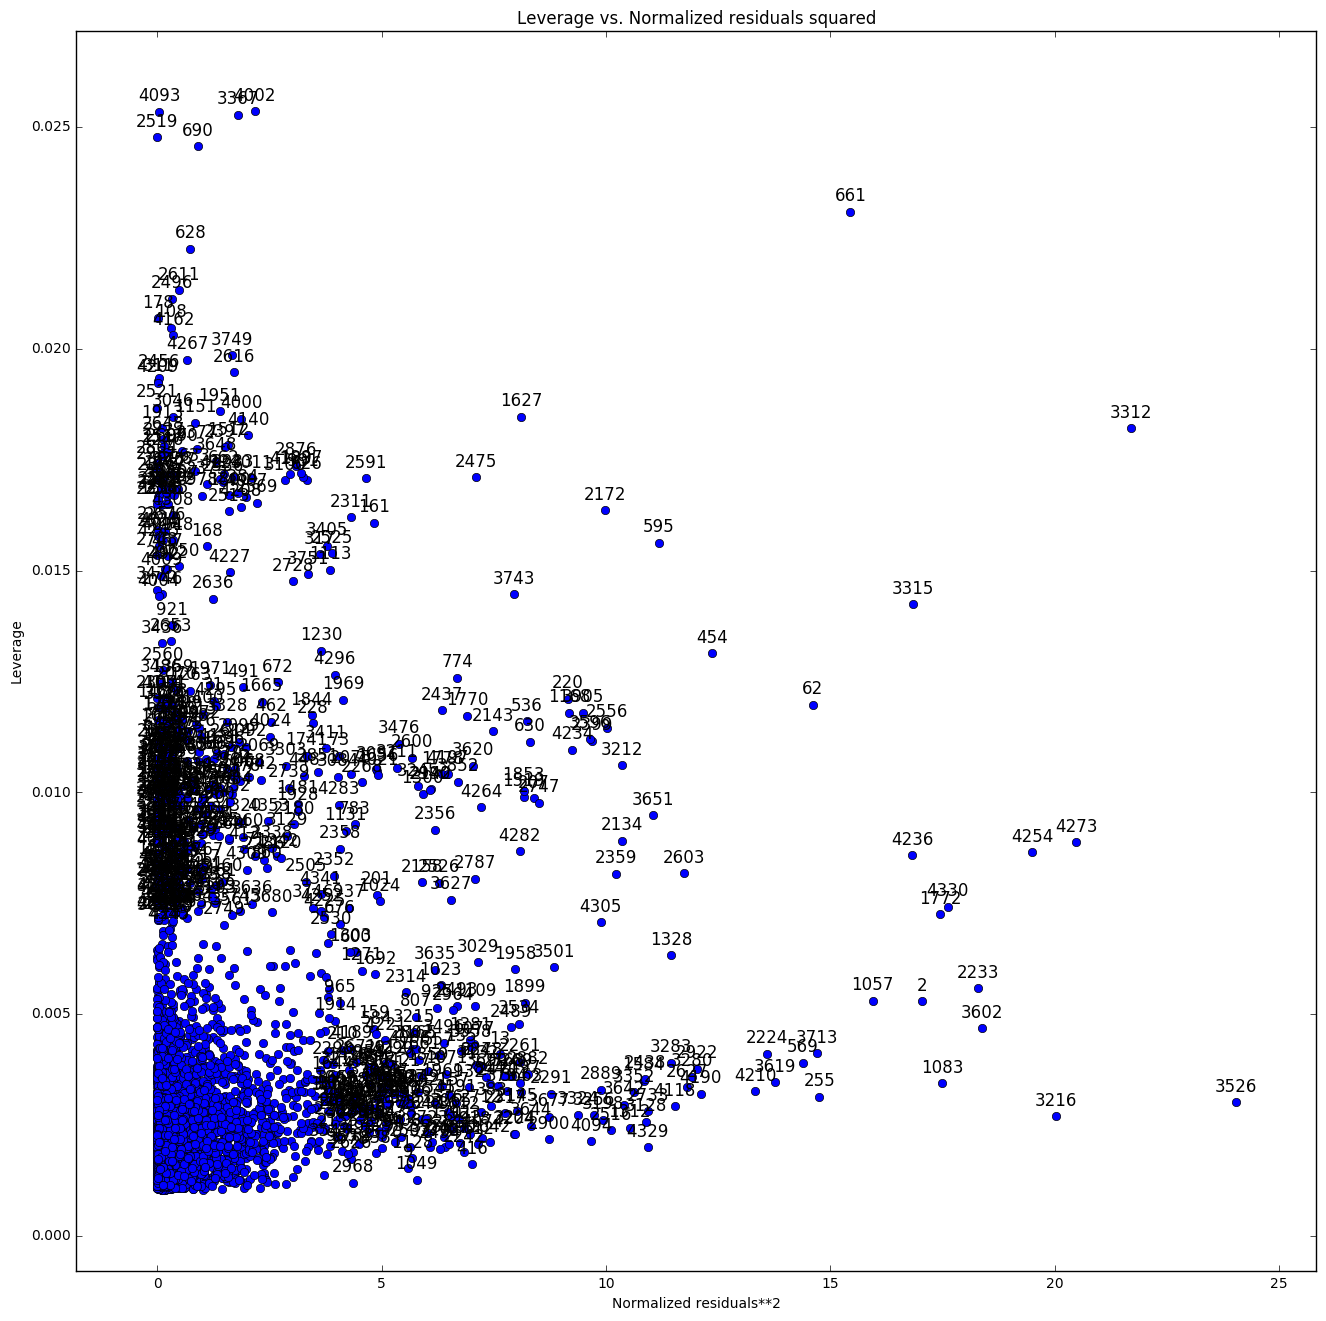

In [28]:
figsize(16,16);
plot_leverage_resid2(m2.fit(cov_type='HC1'));
pylab.show();

In [29]:
leverage = m2.fit(cov_type='HC1').get_influence().hat_matrix_diag

In [30]:
print(np.unique(leverage>0.05, return_counts=True))

(array([False], dtype=bool), array([4348]))


In [31]:
df2 = df[leverage<0.05]

In [32]:
print(smf.ols('ceb ~ knowmeth', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7389
Date:                Wed, 07 Dec 2016   Prob (F-statistic):              0.390
Time:                        14:13:10   Log-Likelihood:                -9978.4
No. Observations:                4348   AIC:                         1.996e+04
Df Residuals:                    4346   BIC:                         1.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2767      0.190     11.953      0.0

In [33]:
print(smf.ols('ceb ~ electric', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     22.73
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           1.92e-06
Time:                        14:13:10   Log-Likelihood:                -9967.5
No. Observations:                4348   AIC:                         1.994e+04
Df Residuals:                    4346   BIC:                         1.995e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5074      0.039     63.994      0.0